In [1]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 6.5MB 24.9MB/s 
     |████████████████████████████████| 15.3MB 251kB/s 


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import json
import urllib
import urllib.request

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pip install pysal

     |████████████████████████████████| 2.4MB 5.9MB/s 
     |████████████████████████████████| 112kB 25.3MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 215kB 13.9MB/s 
     |████████████████████████████████| 5.7MB 11.5MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 153kB 52.4MB/s 
     |████████████████████████████████| 235kB 41.5MB/s 
     |████████████████████████████████| 235kB 52.0MB/s 
     |████████████████████████████████| 56.4MB 1.3MB/s 
     |████████████████████████████████| 1.0MB 40.8MB/s 
     |████████████████████████████████| 19.1MB 256kB/s 
     |████████████████████████████████| 2.1MB 765kB/s 
     |████████████████████████████████| 40.6MB 1.7MB/s 
     |

In [4]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
sf = pd.read_csv('/content/drive/MyDrive/exports/SF_ele_single station.csv' , index_col=0 )
sf.head()

,lat,lng,elevation
station_id,,,
SF-M26,37.767088,-122.407380,12
SF-M25,37.767100,-122.410662,15
SF-M26-2,37.768568,-122.404238,4
SF-L27,37.771075,-122.402732,4
SF-K26,37.771461,-122.405788,4


In [6]:
sf.columns

Index(['lat', 'lng', 'elevation'], dtype='object')

In [7]:
sf_ele= sf[['elevation']]
sf_ele.head()

,elevation
station_id,
SF-M26,12
SF-M25,15
SF-M26-2,4
SF-L27,4
SF-K26,4


In [8]:
gdf_dt= gpd.GeoDataFrame(sf,geometry=gpd.points_from_xy(sf.lng, sf.lat)).set_crs('EPSG:4326')
gdf_dt.head()

,lat,lng,elevation,geometry
station_id,,,,
SF-M26,37.767088,-122.407380,12,POINT (-122.40738 37.76709)
SF-M25,37.767100,-122.410662,15,POINT (-122.41066 37.76710)
SF-M26-2,37.768568,-122.404238,4,POINT (-122.40424 37.76857)
SF-L27,37.771075,-122.402732,4,POINT (-122.40273 37.77108)
SF-K26,37.771461,-122.405788,4,POINT (-122.40579 37.77146)


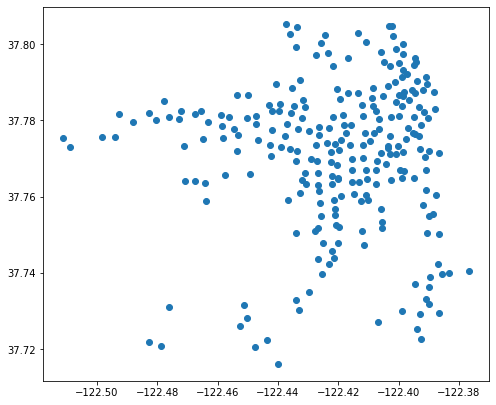

In [9]:
gdf_dt.plot(figsize=(8,8))

In [10]:
zipcode = gpd.read_file('/content/drive/MyDrive/data (1)/shapefiles (1)/zipcodes (1)/san_francisco (1).shp')

In [11]:
zipcode.head()

,area,length,po_name,state,zip,geometry
0,3.690611e+07,33638.933160,SAN FRANCISCO,CA,94103,"POLYGON ((-122.42641 37.76467, -122.42653 37.7..."
1,2.923981e+07,30323.948555,SAN FRANCISCO,CA,94109,"POLYGON ((-122.41195 37.78886, -122.41188 37.7..."
2,3.056166e+07,24300.439024,SAN FRANCISCO,CA,94115,"POLYGON ((-122.42851 37.77906, -122.42998 37.7..."
3,1.238288e+07,26722.984980,SAN FRANCISCO,CA,94105,"POLYGON ((-122.40355 37.78757, -122.40340 37.7..."
4,1.960458e+06,7187.004374,SAN FRANCISCO,CA,94104,"POLYGON ((-122.40340 37.78768, -122.40387 37.7..."


In [12]:
from sklearn.mixture import GaussianMixture 

In [20]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [17]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

NameError: ignored

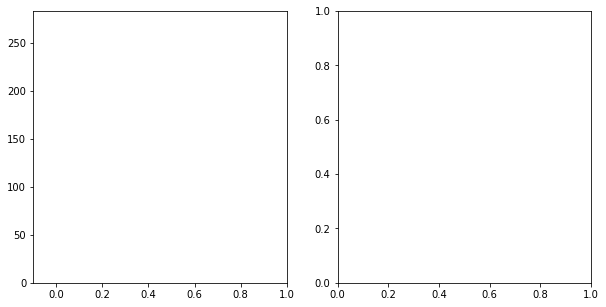

In [18]:
silhouette_score_plot(sf_ele,range(2,6))

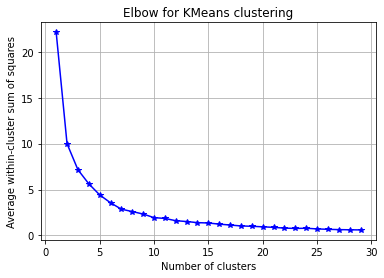

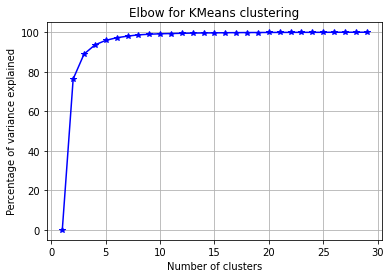

In [21]:
elbow(sf_ele, range(1,30))

In [22]:
sf_new = pd.read_csv('/content/drive/MyDrive/data/full.csv' , index_col=0 )
sf_new.head()

,in,out,diff
station_id,,,
SF-M26,557,488,69
SF-M25,1723,1704,19
SF-M26-2,2466,2224,242
SF-L27,961,975,-14
SF-K26,3164,2580,584


In [135]:
sf_new.sum()

in      542241
out     542241
diff         0
dtype: int64

In [49]:
sf_full = pd.read_csv('/content/drive/MyDrive/exports/SF_full.csv' , index_col=0 )
sf_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4029,BD19F002C21065E0,classic_bike,2021-02-26 15:29:27,2021-02-26 15:31:14,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
4052,6D4ED519944CC5E5,classic_bike,2021-02-24 15:06:14,2021-02-24 15:39:29,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
10561,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member
10562,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member
10563,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member


In [129]:
sf_full

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4029,BD19F002C21065E0,classic_bike,2021-02-26 15:29:27,2021-02-26 15:31:14,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
4052,6D4ED519944CC5E5,classic_bike,2021-02-24 15:06:14,2021-02-24 15:39:29,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
10561,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member
10562,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member
10563,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111068,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member
111069,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member
111070,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member
111071,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member


In [122]:
sf_unique= sf_full['start_station_id'].unique()

In [126]:
len(sf_full['start_station_id'].unique())

455

In [120]:
sf_unique = sf_full.drop_ducplicates(['start_station_id'])

AttributeError: ignored

In [132]:
ebike_count=sf_ebike.groupby(by='start_station_id', as_index=False).count()[['start_station_id','rideable_type']]
ebike_count.rename(columns={'rideable_type':'ebike_trips'}, inplace=True)
ebike_count

,start_station_id,ebike_trips
0,SF I29-1,115
1,SF-A19,116
2,SF-A20,217
3,SF-A27,90
4,SF-AA15,15
...,...,...
324,SJ-Q11,8
325,SJ-Q4,9
326,SJ-Q5,6
327,SJ-Q8,4


In [134]:
cbike_count.sum()

start_station_id    BK-A3BK-A7BK-B7BK-C1BK-C5BK-C6BK-C7BK-C8BK-C9B...
cbike_trips                                                     31686
dtype: object

In [90]:
cbike_count=sf_cbike.groupby(by='start_station_id', as_index=False).count()[['start_station_id','rideable_type']]
cbike_count.rename(columns={'rideable_type':'cbike_trips'}, inplace=True)
cbike_count

,start_station_id,cbike_trips
0,BK-A3,42
1,BK-A7,75
2,BK-B7,85
3,BK-C1,59
4,BK-C5,61
...,...,...
448,SJ-Q4,13
449,SJ-Q5,2
450,SJ-Q8,4
451,SJ-Q9,3


In [91]:
bikeCount= cbike_count.merge(ebike_count,left_on='start_station_id', right_on='start_station_id',how='left')
bikeCount

,start_station_id,cbike_trips,ebike_trips
0,BK-A3,42,NaN
1,BK-A7,75,NaN
2,BK-B7,85,NaN
3,BK-C1,59,NaN
4,BK-C5,61,NaN
...,...,...,...
448,SJ-Q4,13,9.0
449,SJ-Q5,2,6.0
450,SJ-Q8,4,4.0
451,SJ-Q9,3,1.0


In [92]:
bikeCount= bikeCount.fillna(0)

In [93]:
bikeCount['cbikenom']=bikeCount['cbike_trips']/(bikeCount['cbike_trips']+bikeCount['ebike_trips'])
bikeCount['ebikenom']=bikeCount['ebike_trips']/(bikeCount['cbike_trips']+bikeCount['ebike_trips'])

In [100]:
bikenom= bikeCount[['start_station_id',	'cbikenom',	'ebikenom']]
bikenom=bikenom.set_index('start_station_id')
bikenom

,cbikenom,ebikenom
start_station_id,,
BK-A3,1.000000,0.000000
BK-A7,1.000000,0.000000
BK-B7,1.000000,0.000000
BK-C1,1.000000,0.000000
BK-C5,1.000000,0.000000
...,...,...
SJ-Q4,0.590909,0.409091
SJ-Q5,0.250000,0.750000
SJ-Q8,0.500000,0.500000


In [107]:
def Kmean_range(n,dt):
 for n_clusters in range(2,n): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(dt)
    #report average Silhouette score
    silhouette_avg = silhouette_score(dt, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    

In [111]:
def GaussianMixture_range(n,dt):
 for n_clusters in range(2,n):
    km = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_new)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_new, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

In [109]:
Kmean_range(10,bikenom)

For n_clusters =2, the average silhouette_score is :0.7777557265591509
For n_clusters =3, the average silhouette_score is :0.6665399149722286
For n_clusters =4, the average silhouette_score is :0.6745133587578132
For n_clusters =5, the average silhouette_score is :0.6820268917536744
For n_clusters =6, the average silhouette_score is :0.6724344417761032
For n_clusters =7, the average silhouette_score is :0.6743625250015272
For n_clusters =8, the average silhouette_score is :0.6895582245312132
For n_clusters =9, the average silhouette_score is :0.6812198189823716


In [112]:
GaussianMixture_range(10,bikenom)

For n_clusters =2, the average silhouette_score is :0.490899684691279
For n_clusters =3, the average silhouette_score is :0.42471074069385323
For n_clusters =4, the average silhouette_score is :0.3839792666641849
For n_clusters =5, the average silhouette_score is :0.4076582414730796
For n_clusters =6, the average silhouette_score is :0.37250604414661215
For n_clusters =7, the average silhouette_score is :0.3846828067678665
For n_clusters =8, the average silhouette_score is :0.4327684074444098
For n_clusters =9, the average silhouette_score is :0.4474197181771069


In [24]:
def KMean_get(n,dt):
 rr = KMeans(n_clusters = n, random_state = 0).fit(dt)
 rr.labels_ = rr.predict(dt) 
 clust={dt.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}
 res3=pd.DataFrame({'id':dt.index, 'label':rr.labels_})
 return res3

In [114]:
KMean_get(5,bikenom)

,id,label
0,BK-A3,1
1,BK-A7,1
2,BK-B7,1
3,BK-C1,1
4,BK-C5,1
...,...,...
448,SJ-Q4,4
449,SJ-Q5,3
450,SJ-Q8,0
451,SJ-Q9,4


In [110]:
Kmean_range(10,sf_new)

For n_clusters =2, the average silhouette_score is :0.5721143914069179
For n_clusters =3, the average silhouette_score is :0.51999559975955
For n_clusters =4, the average silhouette_score is :0.5237256700914698
For n_clusters =5, the average silhouette_score is :0.5103151421632335
For n_clusters =6, the average silhouette_score is :0.4419195077285781
For n_clusters =7, the average silhouette_score is :0.4734379678082678
For n_clusters =8, the average silhouette_score is :0.46233162232120356
For n_clusters =9, the average silhouette_score is :0.45079928356543736


In [113]:
GaussianMixture_range(10,sf_new)

For n_clusters =2, the average silhouette_score is :0.490899684691279
For n_clusters =3, the average silhouette_score is :0.42471074069385323
For n_clusters =4, the average silhouette_score is :0.3839792666641849
For n_clusters =5, the average silhouette_score is :0.4076582414730796
For n_clusters =6, the average silhouette_score is :0.37250604414661215
For n_clusters =7, the average silhouette_score is :0.3846828067678665
For n_clusters =8, the average silhouette_score is :0.4327684074444098
For n_clusters =9, the average silhouette_score is :0.4474197181771069


In [25]:
KMean_get(4,sf_new)

,id,label
0,SF-M26,0
1,SF-M25,3
2,SF-M26-2,3
3,SF-L27,0
4,SF-K26,2
...,...,...
248,SF-Z16,0
249,SF-Y14,0
250,SF-X14,0
251,SF-X19,0


In [29]:
sf.reset_index(inplace=True)
sf = sf.rename(columns = {'index':'station'})
sf= sf[['station_id',	'lat',	'lng'	,'elevation']]
sf.head()

,station_id,lat,lng,elevation
0,SF-M26,37.767088,-122.407380,12
1,SF-M25,37.767100,-122.410662,15
2,SF-M26-2,37.768568,-122.404238,4
3,SF-L27,37.771075,-122.402732,4
4,SF-K26,37.771461,-122.405788,4


In [26]:
def plot_stations(zips_gdf, stations_gdf, column, title):
    fig, ax = plt.subplots(figsize=(15, 15))
    zips_gdf.plot(ax=ax, color='grey')
    norm = matplotlib.colors.Normalize()
    stations_gdf.plot(ax=ax,
            column=column,
            norm=norm,
            legend=True,
            cmap='coolwarm',
            edgecolors='black')
    ax.set_title(title)
    plt.show()

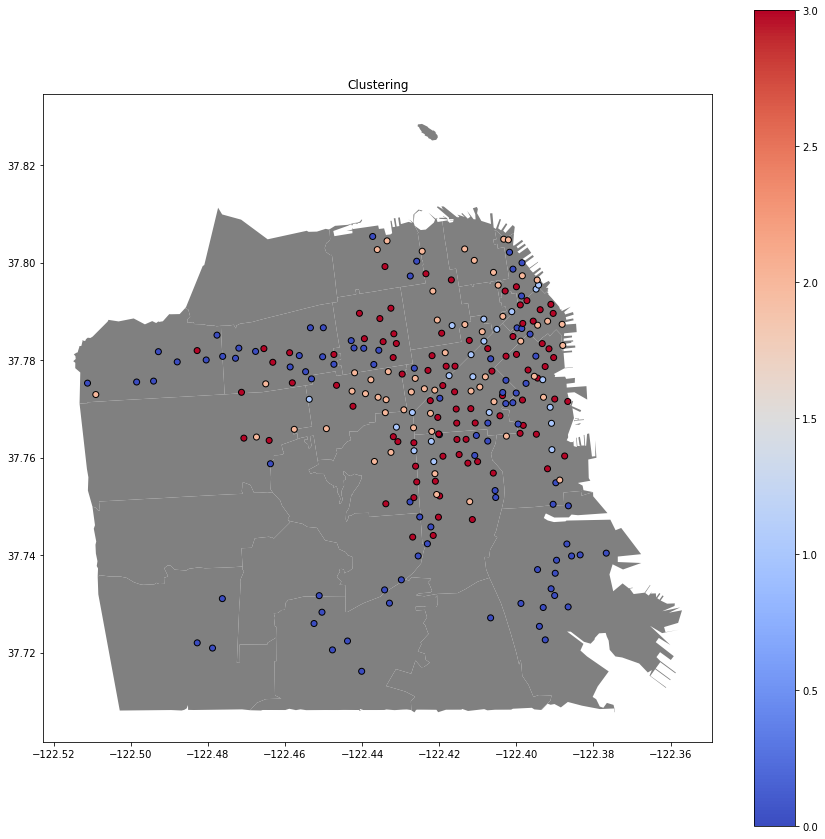

In [31]:
sf_merge2=sf.merge(KMean_get(4,sf_new),left_on='station_id', right_on='id')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', 'Clustering')

In [33]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_ele)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_ele, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5959248390300971
For n_clusters =3, the average silhouette_score is :0.5951194565622665
For n_clusters =4, the average silhouette_score is :0.5434484681392069
For n_clusters =5, the average silhouette_score is :0.5468633928913825
For n_clusters =6, the average silhouette_score is :0.5482588784645742
For n_clusters =7, the average silhouette_score is :0.5851562079363685
For n_clusters =8, the average silhouette_score is :0.604732482990755
For n_clusters =9, the average silhouette_score is :0.6167821981897742
For n_clusters =10, the average silhouette_score is :0.6051123429059283


In [35]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_ele)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_ele, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.6932313750733121
For n_clusters =3, the average silhouette_score is :0.6566316325331474
For n_clusters =4, the average silhouette_score is :0.6286368186828678
For n_clusters =5, the average silhouette_score is :0.5958487993009394
For n_clusters =6, the average silhouette_score is :0.5996431356652081
For n_clusters =7, the average silhouette_score is :0.6008762312851544
For n_clusters =8, the average silhouette_score is :0.6156311244496662
For n_clusters =9, the average silhouette_score is :0.6313748179957491
For n_clusters =10, the average silhouette_score is :0.5933461464196911


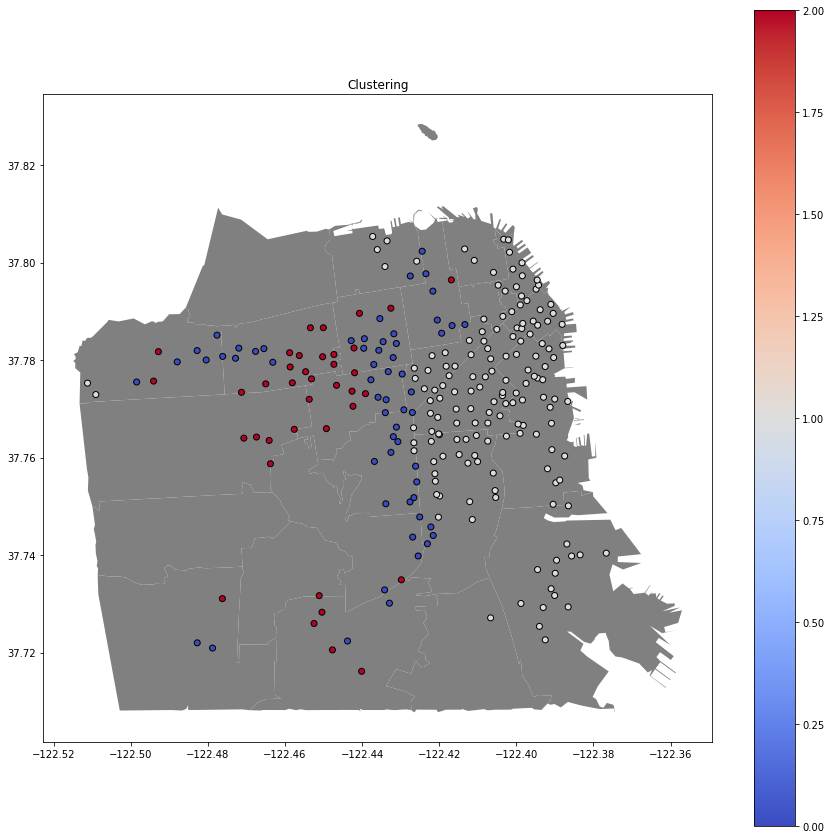

In [36]:
sf_merge2=sf.merge(KMean_get(3,sf_ele),left_on='station_id', right_on='id')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', 'Clustering')

In [37]:
rr9 = GaussianMixture(n_components = 9, random_state = 0).fit(sf_ele)
rr9.labels_ = rr9.predict(sf_ele) 
clust={sf_ele.index[i]:rr9.labels_[i] for i in range(len(rr9.labels_))}
res2=pd.DataFrame({'geometry':sf_ele.index, 'label':rr9.labels_})
res2

,geometry,label
0,SF-M26,8
1,SF-M25,0
2,SF-M26-2,2
3,SF-L27,2
4,SF-K26,2
...,...,...
248,SF-Z16,6
249,SF-Y14,7
250,SF-X14,7
251,SF-X19,3


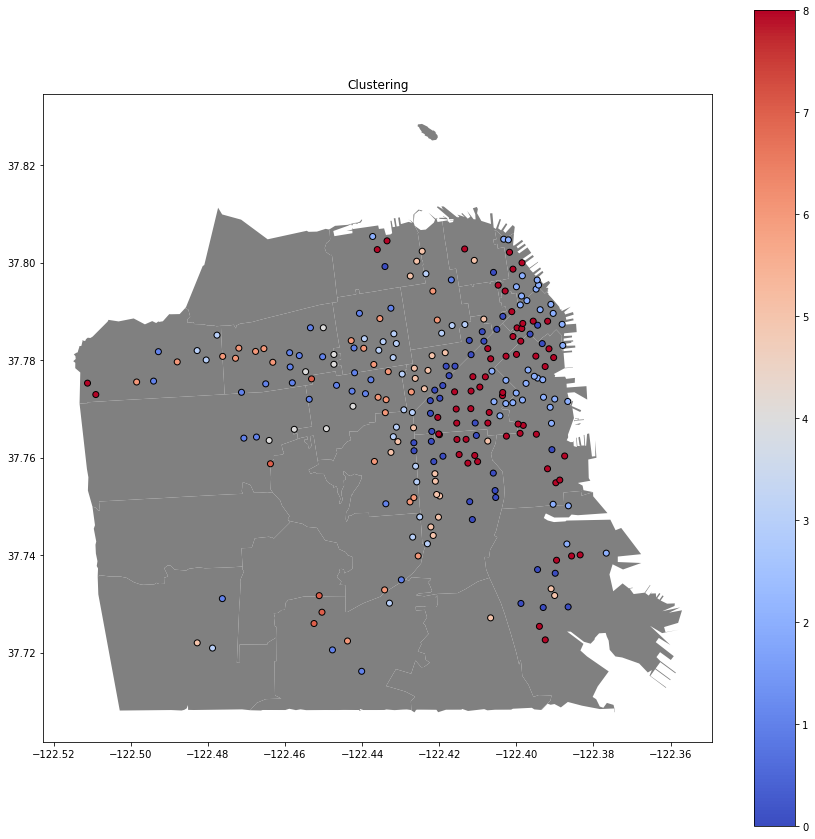

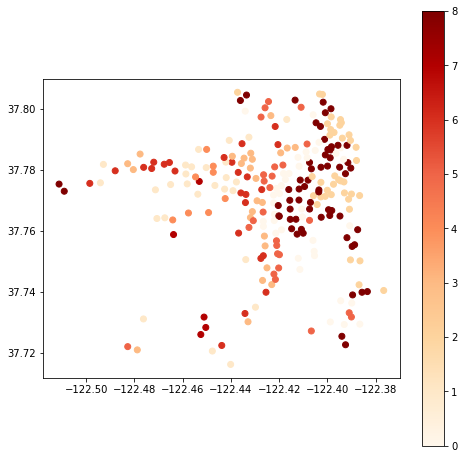

In [39]:
sf_merge2=sf.merge(res2,left_on='station_id', right_on='geometry')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', 'Clustering')
gdf_dt3.plot(figsize=(8,8), column='label', legend = True, cmap='OrRd')

**Part 2**

In [ ]:
bikes_full_e_1.to_csv(r'/content/drive/MyDrive/exports/sf_ebike_lat.csv')
bikes_full_c_1.to_csv(r'/content/drive/MyDrive/exports/sf_cbike_lat.csv')
bikes_full_e_2.to_csv(r'/content/drive/MyDrive/exports/sf_ebike_id.csv')
bikes_full_c_2.to_csv(r'/content/drive/MyDrive/exports/sf_cbike_id.csv')